In [29]:
from Bio import SeqIO
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import re
from collections import defaultdict

In [3]:
seqdict = {}
for record in SeqIO.parse('../data/seqs/cypriniformes_augustus_finz.fa', 'fasta'):
    seqdict[record.id] = str(record.seq)

In [4]:
seqlens = [(key, len(val)) for key, val in seqdict.items()]
length_df = pd.DataFrame(seqlens, columns=['name', 'length'])
print(length_df.head())

                         name  length
0  Anabarilius_grahami_g16.t1     485
1  Anabarilius_grahami_g18.t1     201
2  Anabarilius_grahami_g20.t1     399
3  Anabarilius_grahami_g21.t1     425
4  Anabarilius_grahami_g23.t1     334


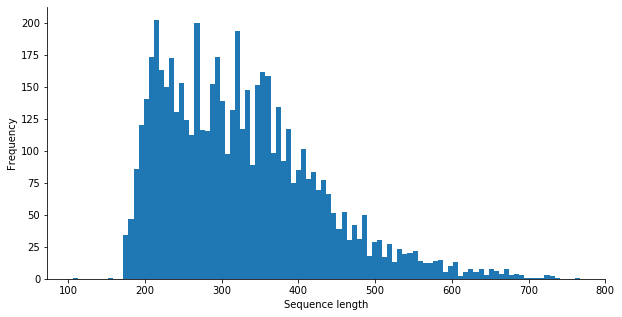

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(length_df.length, bins=100)
ax.set_xlabel('Sequence length')
ax.set_ylabel('Frequency')
sns.despine()
plt.show()

In [44]:
with open('../data/species_genomes.txt') as infile:
    species = [line.split()[0] for line in infile]
gffs = {sp: f'../data/gffs/{sp}_augustus_finz.gff' for sp in species}

exondict = defaultdict(int)
for sp, filename in gffs.items():
    with open(filename) as infile:
        for line in infile:
            if re.match('#', line):
                continue
            if re.search('\tCDS\t', line):
                gene = re.search('ID=(\w+\.\w+).cds', line).group(1)
                exondict[f'{sp}_{gene}'] += 1
exon_df = pd.DataFrame([(key, val) for key, val in exondict.items()], columns=['gene', 'exons'])
exon_df['species'] = exon_df.gene.apply(lambda x: '_'.join(x.split('_')[:2]))
print(exon_df.head())


                        gene  exons              species
0  Pimephales_promelas_g1.t1      5  Pimephales_promelas
1  Pimephales_promelas_g2.t1      3  Pimephales_promelas
2  Pimephales_promelas_g3.t1      1  Pimephales_promelas
3  Pimephales_promelas_g4.t1      4  Pimephales_promelas
4  Pimephales_promelas_g5.t1     10  Pimephales_promelas


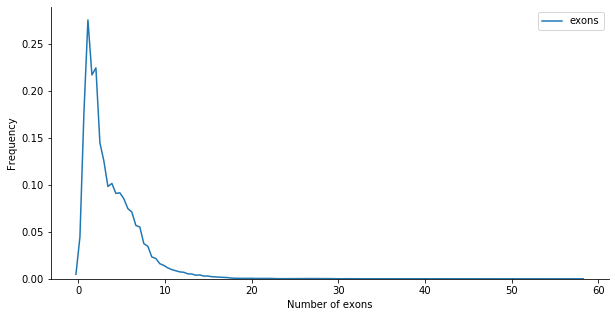

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))
# ax.hist(exon_df.exons, bins=len(set(exon_df.exons)), density=True)
# dist.plot.kde(exon_df.exons, ax=ax)
sns.kdeplot(exon_df.exons)
ax.set_xlabel('Number of exons')
ax.set_ylabel('Frequency')
sns.despine()
plt.show()


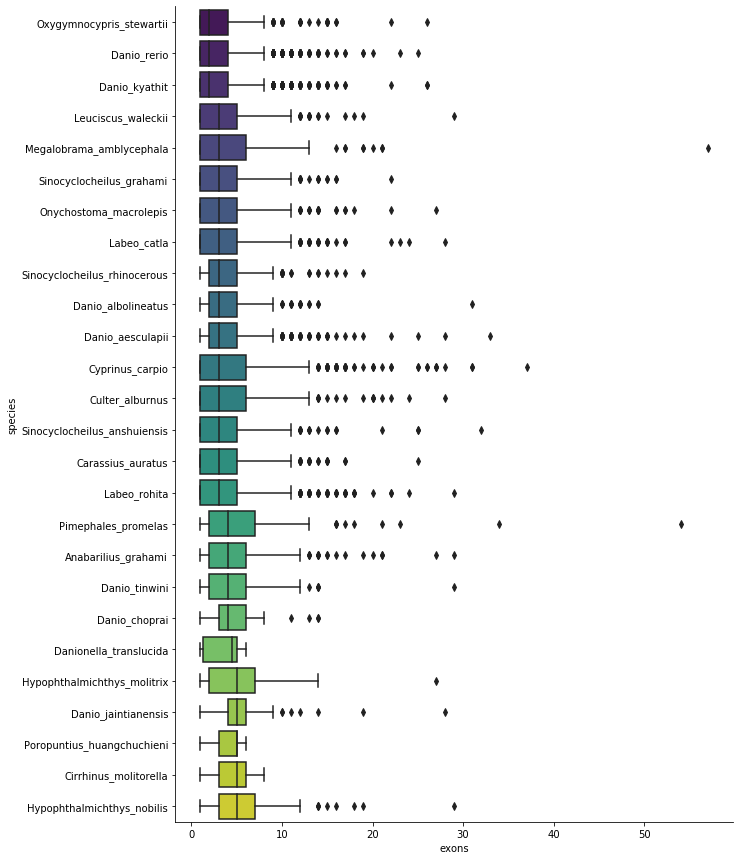

In [101]:
sortorder = exon_df.groupby('species').median().reset_index().sort_values('exons').species.tolist()
fig, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(data=exon_df, x='exons', y='species', order=sortorder, palette='viridis')
sns.despine()
plt.show()